# Mohamed Sherif Elsayed
# Sec 3 


# Importing Library


In [1]:
import matplotlib.pyplot as plt
import pandas as pd

# reading Data.csv getting the first  500 rows and all columns

In [2]:
dataset = pd.read_csv('data.csv')
X = dataset.iloc[:500,:].values

X.shape

(500, 8)

# Data Wrangling

In [7]:
dataset.head()

,0,1,2,3,4,5,6,7
0,-2.084839,-0.471673,-0.955542,-0.567288,-0.953226,-1.510386,0.921728,0.437954
1,0.003700,-0.999118,0.202003,1.612001,-0.375642,0.378518,0.113693,1.718011
2,-1.456240,0.483522,-0.508605,-0.316406,-1.695560,-1.943310,0.299486,0.147370
3,-1.595524,-0.219744,1.039403,0.381587,0.109094,-0.155068,0.156054,0.007314
4,0.995277,-1.517259,-0.101198,1.415742,-0.054356,0.611216,0.196938,0.641809


In [8]:
dataset.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       1309 non-null   float64
 1   1       1309 non-null   float64
 2   2       1309 non-null   float64
 3   3       1309 non-null   float64
 4   4       1309 non-null   float64
 5   5       1309 non-null   float64
 6   6       1309 non-null   float64
 7   7       1309 non-null   float64
dtypes: float64(8)
memory usage: 81.9 KB


In [15]:
dataset.describe()


,0,1,2,3,4,5,6,7
count,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03,1.309000e+03
mean,-2.368222e-11,-2.291847e-12,7.639435e-12,3.819711e-12,3.819705e-12,2.444612e-11,-2.902980e-11,1.222311e-11
std,1.917490e+00,1.633490e+00,1.120277e+00,1.073415e+00,8.484723e-01,7.963570e-01,7.837269e-01,7.496296e-01
min,-2.343054e+00,-5.895619e+00,-3.785076e+00,-5.443483e+00,-3.929435e+00,-2.514852e+00,-2.399253e+00,-4.959774e+00
25%,-1.638221e+00,-9.607650e-01,-5.837243e-01,-5.062350e-01,-4.905089e-01,-4.722723e-01,-4.604733e-01,-4.428151e-01
50%,-5.167353e-01,-3.189201e-01,4.969400e-02,1.880785e-01,3.376454e-02,-2.054734e-02,2.479064e-02,5.398186e-02
75%,1.326847e+00,6.082356e-01,8.704473e-01,5.425078e-01,4.565319e-01,5.822781e-01,4.426679e-01,4.456012e-01
max,7.287744e+00,3.949870e+00,3.230730e+00,2.816763e+00,3.037647e+00,2.819698e+00,4.367357e+00,3.555232e+00


In [13]:
dataset.isna().sum()


0    0
1    0
2    0
3    0
4    0
5    0
6    0
7    0
dtype: int64

# trians the algorithm

In [3]:
from sklearn.cluster import KMeans

# making a list of different inertia to get elbow

C:\Users\Moham\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:881: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=2.
  warnings.warn(


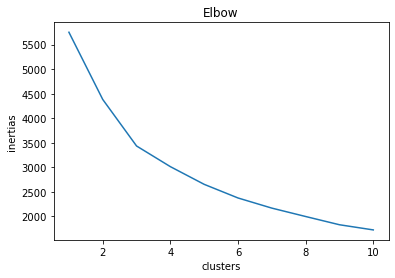

In [18]:
ilist = []
n = 11
for i in range(1,n):
    kmeans = KMeans(n_clusters = i)
    kmeans.fit(X)
    #inirtia are the square root between distance and centers .
    ilist.append(kmeans.inertia_)

plt.plot(range(1,n), ilist)
plt.title('Elbow')
plt.xlabel('clusters')
plt.ylabel('inertias')
plt.show()

# setting kmeans to 5

In [22]:
# after we plot we make sure that num of clusters should be 6 

kmeans = KMeans(n_clusters = 5, init = 'k-means++')
y_kmeans = kmeans.fit_predict(X)

No handles with labels found to put in legend.


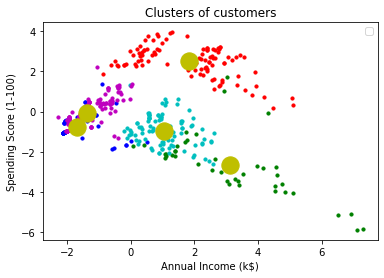

In [23]:
# Visualising the clusters

plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 10, c = 'r')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 10, c = 'b')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 10, c = 'g')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 10, c = 'c')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 10, c = 'm')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 300, c = 'y')
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()